<a href="https://colab.research.google.com/github/Value1965/Netology/blob/main/%D0%9D%D0%B5%D1%82%D0%BE%D0%BB%D0%BE%D0%B3%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Загрузим нужные библиотеки

In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import numpy as np
from sklearn.metrics import recall_score, precision_score
from datetime import datetime

%matplotlib inline

##Подключим Google Disk для сохранения решений.

In [117]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Скачиваем тренировочный датасет

In [118]:
!wget https://lodmedia.hb.bizmrg.com/case_files/774967/train_dataset_train.csv
df = pd.read_csv("/content/train_dataset_train.csv")

--2022-08-06 07:28:34--  https://lodmedia.hb.bizmrg.com/case_files/774967/train_dataset_train.csv
Resolving lodmedia.hb.bizmrg.com (lodmedia.hb.bizmrg.com)... 217.69.142.100
Connecting to lodmedia.hb.bizmrg.com (lodmedia.hb.bizmrg.com)|217.69.142.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33402303 (32M) [text/csv]
Saving to: ‘train_dataset_train.csv.2’

train_dataset_train 100%[===================>]  31.85M  11.0MB/s    in 2.9s    

2022-08-06 07:28:38 (11.0 MB/s) - ‘train_dataset_train.csv.2’ saved [33402303/33402303]



## Рассмотрим датасет по ближе

In [119]:
df.head(10)

,id,age_indicator,month_id,student_id,program_id,carts_created_at,spent_time_total,spent_time_to_complete_hw,completed_hw,failed_hw,...,p_total_calls,p_was_conversations,p_total_duration,support_feedback_avg,feedback_avg_d1,feedback_avg_d2,feedback_avg_d3,feedback_avg_d4,feedback_avg_d5,target
0,15182,32.0,9/30/2020,6694527,1469,8/26/2020,163.0,0.0,1.0,0.0,...,NaN,NaN,NaN,4.0,5.0,NaN,NaN,NaN,NaN,0
1,89385,NaN,6/30/2021,6712877,1392,8/5/2020,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,47931,NaN,2/28/2021,6659444,376,6/20/2020,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,279085,1.0,11/30/2021,7151591,1160,4/14/2021,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,7806,30.0,10/31/2020,6705666,952,7/19/2020,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,0
5,221530,NaN,4/30/2021,6784019,789,12/20/2020,9.0,NaN,0.0,0.0,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,5.0,NaN,0
6,80963,5.0,4/30/2021,6409144,242,2/27/2021,28.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4.566105,NaN,NaN,0
7,220105,NaN,4/30/2021,6314133,998,10/4/2020,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,0
8,215541,30.0,3/31/2021,6880163,459,11/6/2020,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,5.0,NaN,NaN,5.000000,NaN,NaN,3
9,73193,11.0,5/31/2021,6629109,871,6/21/2020,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


## Рассмотрим поля датасета

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 59 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         200000 non-null  int64  
 1   age_indicator              159123 non-null  float64
 2   month_id                   200000 non-null  object 
 3   student_id                 200000 non-null  int64  
 4   program_id                 200000 non-null  int64  
 5   carts_created_at           200000 non-null  object 
 6   spent_time_total           86309 non-null   float64
 7   spent_time_to_complete_hw  42467 non-null   float64
 8   completed_hw               97599 non-null   float64
 9   failed_hw                  97599 non-null   float64
 10  reworked_hw                97599 non-null   float64
 11  interacted_hw              97599 non-null   float64
 12  avg_hw_mark                44496 non-null   float64
 13  test_with_good_mark        97

## Категориальные поля

In [121]:

cat_cols=['student_id', 'program_id', 'payment_type', 'promo',
       'communication_type', 'auto_payment', 'ABC', 'gender', #'city', 'country',
       'os', 'browser', 'platform']


##Поработаем c полями country и city

In [122]:
#Существуют города без стран
df[df['city'].notna()]['country'].isna().sum()

736

In [123]:
# Существуют страны без городов
df[df['country'].notna()&df['city'].isna()][['student_id','country','city']]

,student_id,country,city
3257,5430379,Россия,NaN
6377,5457646,Россия,NaN
7126,4841121,Россия,NaN
7158,5430379,Россия,NaN
8137,4841121,Россия,NaN
...,...,...,...
176499,6883877,Россия,NaN
177732,4841121,Россия,NaN
181390,5291453,Россия,NaN
182236,6175663,Россия,NaN


In [124]:
i=0
for col in ['city','country']:#data.keys():
    print(f"{col} DISTRIBUTION")
    print(df[col].value_counts())
    i+=1

city DISTRIBUTION
Москва             5943
Санкт-Петербург    1698
Екатеринбург        272
Нижний Новгород     217
Новосибирск         195
                   ... 
Михайловск            1
Таганрог              1
Almere                1
Budva                 1
Москва/Сочи           1
Name: city, Length: 276, dtype: int64
country DISTRIBUTION
Россия                   11727
Беларусь                   203
РФ                         202
Казахстан                  161
Украина                    157
Росссия                     52
Кыргызстан                  47
Кипр                        41
Латвия                      36
Германия                    28
Чешская Республика          20
Китай                       20
Франция                     19
Бельгия                     19
Испания                     17
Швейцария                   17
<span>Россия</span>         17
США                         15
Польша                      13
Люксембург                  13
Чили                        11
Великобр

In [125]:
# Исправим названия городов
df.loc[(df['city']== 'Млсква')
      |(df['city']=='Москава') 
      |(df['city']=='Москва, MOW')
      |(df['city']=='Москва/Сочи')
      |(df['city']=='Мрсква')
      |(df['city']=='г. Москва')
      |(df['city']==' Москва')
      |(df['city']=='г.Москвах') , 'city'] = 'Москва'

df.loc[(df['city']=='казань') , 'city'] = 'Казань'

def correct_city(city_list, city):
  for item in city_list:
    df.loc[df['city']==item , 'city'] = city

city_list=['Санкт ~Петербург ',
 'Санкт петербург',
 'Санкт-Петербрг',
 'Санкт-Петербург',
 'Санкт-Петербург-Москва','Cанкт-Петербург','СПб']
correct_city(city_list,'Санкт-Петербург')

In [126]:
#Исправим названия стран
df.loc[df['country']=='<span>Россия</span>', 'country'] = 'Россия'
df.loc[df['country']=='Росссия', 'country'] = 'Россия'
df.loc[df['country']=='РФ', 'country'] = 'Россия'

df.loc[df['country']=='Республика Беларусь', 'country'] = 'Беларусь'

for col in ['city']:#data.keys():,'country'
    print(f"{col} DISTRIBUTION")
    
    print(df[col].value_counts())
    i+=1

city DISTRIBUTION
Москва              6026
Санкт-Петербург     1756
Екатеринбург         272
Нижний Новгород      217
Новосибирск          195
                    ... 
Таганрог               1
Великий Новгород       1
д. Кульнево            1
Almere                 1
Budva                  1
Name: city, Length: 263, dtype: int64


In [127]:
df['country']=df['country'].fillna('Россия')

In [128]:
bigcity=df['city'].value_counts().keys()[:25] #20

In [129]:
bigcity

Index(['Москва', 'Санкт-Петербург', 'Екатеринбург', 'Нижний Новгород',
       'Новосибирск', 'Краснодар', 'Минск', 'Иркутск', 'Самара', 'Казань',
       'Тула', 'Пермь', 'Владивосток', 'Ростов-на-Дону', 'Воронеж', 'Сочи',
       'Калининград', 'Уфа', 'Томск', 'Саратов', 'Челябинск', 'Рязань',
       'Алматы', 'Йошкар-Ола', 'Балашиха'],
      dtype='object')

In [130]:
bigcountry = df['country'].value_counts().keys()[:10] #10
bigcountry

Index(['Россия', 'Беларусь', 'Казахстан', 'Украина', 'Кыргызстан', 'Кипр',
       'Латвия', 'Германия', 'Чешская Республика', 'Китай'],
      dtype='object')

In [131]:
def make_abroad(s):
  if s not in bigcountry:
    s = 'Зарубежье'
  
  return s

df['country']=df['country'].apply(make_abroad)

In [132]:
df['country'].value_counts()

Россия                199054
Зарубежье                228
Беларусь                 208
Казахстан                161
Украина                  157
Кыргызстан                47
Кипр                      41
Латвия                    36
Германия                  28
Чешская Республика        20
Китай                     20
Name: country, dtype: int64

In [133]:
def make_others(s):
  if s not in bigcity:
    s = 'Прочее'
  
  return s

df['city']=df['city'].apply(make_others)

In [134]:
df['city'].value_counts()

Прочее             189632
Москва               6026
Санкт-Петербург      1756
Екатеринбург          272
Нижний Новгород       217
Новосибирск           195
Краснодар             178
Минск                 175
Иркутск               137
Самара                133
Казань                133
Тула                  113
Пермь                  99
Владивосток            92
Ростов-на-Дону         92
Воронеж                80
Сочи                   79
Калининград            73
Уфа                    72
Томск                  70
Саратов                69
Рязань                 62
Челябинск              62
Алматы                 62
Йошкар-Ола             61
Балашиха               60
Name: city, dtype: int64

In [135]:
df.insert(3, "country_city", df['country']+'_'+df['city'])
cat_cols.append("country_city")

## Поработаем с временными полями

In [136]:
df.carts_created_at.value_counts()                   

12/30/2020    2940
8/24/2020     1806
8/27/2020     1770
12/31/2020    1738
8/31/2020     1724
              ... 
11/16/2021      28
6/8/2020        24
6/6/2020        22
6/9/2020        13
6/5/2020        13
Name: carts_created_at, Length: 447, dtype: int64

In [137]:

def strtomonth2000(s):

  d=datetime.strptime(s, "%m/%d/%Y")
  return (d.year-2000)*12+d.month

In [138]:
df['month_id']=df['month_id'].apply(strtomonth2000)

In [139]:
df['carts_created_at']=df['carts_created_at'].apply(strtomonth2000)

In [140]:
df.insert(3, "spent_monthies", df['month_id']-df['carts_created_at'])
df.insert(3, "cart_month", df['carts_created_at'] % 12)


In [141]:
df['gender'] = df['gender'].fillna(0)
df['gender']=df['gender'].astype(int)

In [142]:
cat_cols.append("cart_month")


## Поработаем с полем возраст

In [143]:
i=0
for col in ['age_indicator']:#data.keys():
    print(f"{col} DISTRIBUTION")
    print(df[col].value_counts())
    i+=1

age_indicator DISTRIBUTION
25.0    4119
15.0    4066
8.0     4058
32.0    4057
12.0    4057
38.0    4047
39.0    4043
6.0     4043
35.0    4041
1.0     4040
30.0    4034
9.0     4034
22.0    4032
36.0    4031
4.0     4030
33.0    4023
13.0    4023
16.0    4020
10.0    4016
2.0     4013
28.0    4013
24.0    4012
31.0    4004
11.0    4002
29.0    4001
21.0    4000
27.0    3996
20.0    3983
7.0     3977
14.0    3972
26.0    3968
5.0     3959
17.0    3955
37.0    3951
23.0    3948
3.0     3940
19.0    3932
34.0    3887
18.0    3633
40.0    3163
Name: age_indicator, dtype: int64


Text(0.5, 1.0, 'Распределение возраста')

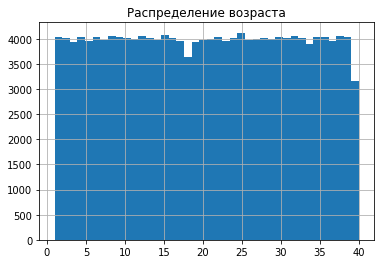

In [144]:
df["age_indicator"].hist(bins = 40).set_title('Распределение возраста')

In [145]:
max(df["age_indicator"])

40.0

In [146]:
df['age_indicator']=df['age_indicator'].fillna(0)
df['age_indicator']=df['age_indicator'].astype(int)

In [147]:
cat_cols.append('age_indicator')

##Заменим все пропуски в данных

In [148]:
df.loc[(df['bought_d1']+df['bought_d2']+df['bought_d3']+df['bought_d4']+df['bought_d5']==0),'bought_avg_duration']=0
i=0
for col in ['bought_avg_duration']:#data.keys():
    print(f"{col} DISTRIBUTION")
    print(df[col].value_counts())
    i+=1

bought_avg_duration DISTRIBUTION
0.0      189641
16.0        572
24.0        456
18.0        432
32.0        360
          ...  
159.0         2
136.0         2
52.0          1
145.0         1
129.0         1
Name: bought_avg_duration, Length: 159, dtype: int64


In [149]:
# bought_avg_duration Зануляем все
df['bought_avg_duration'].isna().sum()

0

In [150]:
i=0
for col in ['bought_avg_duration']:#data.keys():
    print(f"{col} DISTRIBUTION")
    print(df[col].value_counts())
    i+=1

bought_avg_duration DISTRIBUTION
0.0      189641
16.0        572
24.0        456
18.0        432
32.0        360
          ...  
159.0         2
136.0         2
52.0          1
145.0         1
129.0         1
Name: bought_avg_duration, Length: 159, dtype: int64


In [151]:
df['bought_avg_duration'].isna().sum()

0

In [152]:
#df['age_indicator']=df['age_indicator'].fillna(20)
df = df.fillna(0)

##Вывведем список столбцов

In [153]:
df.columns

Index(['id', 'age_indicator', 'month_id', 'cart_month', 'spent_monthies',
       'country_city', 'student_id', 'program_id', 'carts_created_at',
       'spent_time_total', 'spent_time_to_complete_hw', 'completed_hw',
       'failed_hw', 'reworked_hw', 'interacted_hw', 'avg_hw_mark',
       'test_with_good_mark', 'test_with_great_mark', 'webinars',
       'avg_quiz_result', 'notes', 'hw_leader', 'lessons', 'activity',
       'bought_d1', 'bought_d2', 'bought_d3', 'bought_d4', 'bought_d5',
       'bought_avg_duration', 'payment_type', 'promo', 'price',
       'communication_type', 'auto_payment', 'ABC', 'city', 'country',
       'gender', 'speed_recall', 'os', 'browser', 'platform',
       'm_avg_talk_duration', 'm_avg_duration', 'm_missed_calls',
       'm_total_calls', 'm_was_conversations', 'm_total_duration',
       'p_avg_talk_duration', 'p_avg_duration', 'p_missed_calls',
       'p_total_calls', 'p_was_conversations', 'p_total_duration',
       'support_feedback_avg', 'feedback_avg

##Обратим внимание на часть столбцов с постоянными значениями

In [154]:
df.spent_time_to_complete_hw.value_counts()

 0.0    199999
-1.0         1
Name: spent_time_to_complete_hw, dtype: int64

## Выделим выборки

In [155]:
df.dtypes[df.dtypes == "object"].values

array([dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O')], dtype=object)

##Поместим все столбцы object в массив, для их дальнейшего удаления

In [156]:
mass_object = ['id', 'carts_created_at'] #'month_id',

mass_object.append('country')
mass_object.append('city')

mass_object.append('spent_time_to_complete_hw')
# Попробуем убрать еще два малозначимых признака
mass_object.append('hw_leader')
mass_object.append('failed_hw')

mass_object.append('notes')
mass_object.append('avg_quiz_result')
mass_object.extend(['bought_d1', 'bought_d2', 'bought_d3', 'bought_d4', 'bought_d5'])
mass_object.extend(['p_avg_talk_duration', 'p_avg_duration', 'p_missed_calls',
       'p_total_calls', 'p_was_conversations', 'p_total_duration'])
mass_object.extend(['avg_hw_mark','test_with_good_mark', 'test_with_great_mark'])

In [157]:
mass_object_1 = np.append(mass_object, "target")

In [158]:
X = df.drop(mass_object_1, axis = 1)
y = df[["target"]]

In [159]:
X.shape

(200000, 38)

In [160]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 38 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   age_indicator         200000 non-null  int64  
 1   month_id              200000 non-null  int64  
 2   cart_month            200000 non-null  int64  
 3   spent_monthies        200000 non-null  int64  
 4   country_city          200000 non-null  object 
 5   student_id            200000 non-null  int64  
 6   program_id            200000 non-null  int64  
 7   spent_time_total      200000 non-null  float64
 8   completed_hw          200000 non-null  float64
 9   reworked_hw           200000 non-null  float64
 10  interacted_hw         200000 non-null  float64
 11  webinars              200000 non-null  float64
 12  lessons               200000 non-null  float64
 13  activity              200000 non-null  float64
 14  bought_avg_duration   200000 non-null  float64
 15  

In [161]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)
X_train=X
X_test=X
y_train=y
y_test=y

## Обучение модели

In [162]:

parameters = {'depth': [10], 'n_estimators': [1000]}#, 'l2_leaf_reg': [2,3,4]}#, 'leaf_estimation_method': ['Newton'],'grow_policy':['SymmetricTree','Depthwise','Lossguide']} #, 'learning_rate': [0.001,0.005,0.01]

In [163]:
from sklearn.metrics import make_scorer
def my_score(y, y_pred):
  return 0.2* recall_score(y, y_pred, average='macro') + 0.8* precision_score(y, y_pred, average='macro')
my_scorer=make_scorer(my_score)

In [164]:
!pip install catboost
import catboost
from sklearn.model_selection import GridSearchCV
ignored_cols=[]


boost = catboost.CatBoostClassifier(logging_level='Silent', od_type = "Iter",od_wait = 20,boosting_type='Plain',ignored_features=ignored_cols,grow_policy='Depthwise',
                                  task_type='GPU')
                                  
cv = GridSearchCV(boost, param_grid=parameters, n_jobs=-1, scoring=my_scorer, return_train_score=True)
  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [165]:

cv.fit(X_train, y_train, cat_features=cat_cols)
clf = cv.best_estimator_

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [166]:
cv.best_estimator_.get_all_params()

{'add_ridge_penalty_to_loss_function': False,
 'auto_class_weights': 'None',
 'bagging_temperature': 1,
 'bayesian_matrix_reg': 0.10000000149011612,
 'best_model_min_trees': 1,
 'boost_from_average': False,
 'boosting_type': 'Plain',
 'bootstrap_type': 'Bayesian',
 'border_count': 128,
 'class_names': [0, 1, 2, 3, 4, 5],
 'classes_count': 0,
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'FeatureFreq:CtrBorderCount=15:CtrBorderType=Median:Prior=0/1'],
 'counter_calc_method': 'SkipTest',
 'ctr_history_unit': 'Sample',
 'ctr_target_border_count': 1,
 'data_partition': 'DocParallel',
 'depth': 10,
 'devices': '-1',
 'eval_metric': 'MultiClass',
 'feature_border_type': 'GreedyLogSum',
 'fold_permutation_block': 64,
 'fold_size_loss_normalization': False,
 'force_unit_auto_pair_weights': False,
 'gpu_cat_features_storage': 'GpuRam',
 'gpu_ram_part': 0.95,
 'grow_policy': 'Depthwise',


In [167]:
cv.best_params_

{'depth': 10, 'n_estimators': 1000}

## Оценка точности

In [168]:
(cv.cv_results_['split0_test_score']+cv.cv_results_['split1_test_score']+cv.cv_results_['split2_test_score']+cv.cv_results_['split3_test_score']+cv.cv_results_['split4_test_score'])/5

array([0.84264611])

In [169]:
pred = clf.predict(X_test)

In [170]:
0.2* recall_score(y_test, pred, average='macro') + 0.8* precision_score(y_test, pred, average='macro')

0.9720689612663631

##Посмотрим на важность признаков

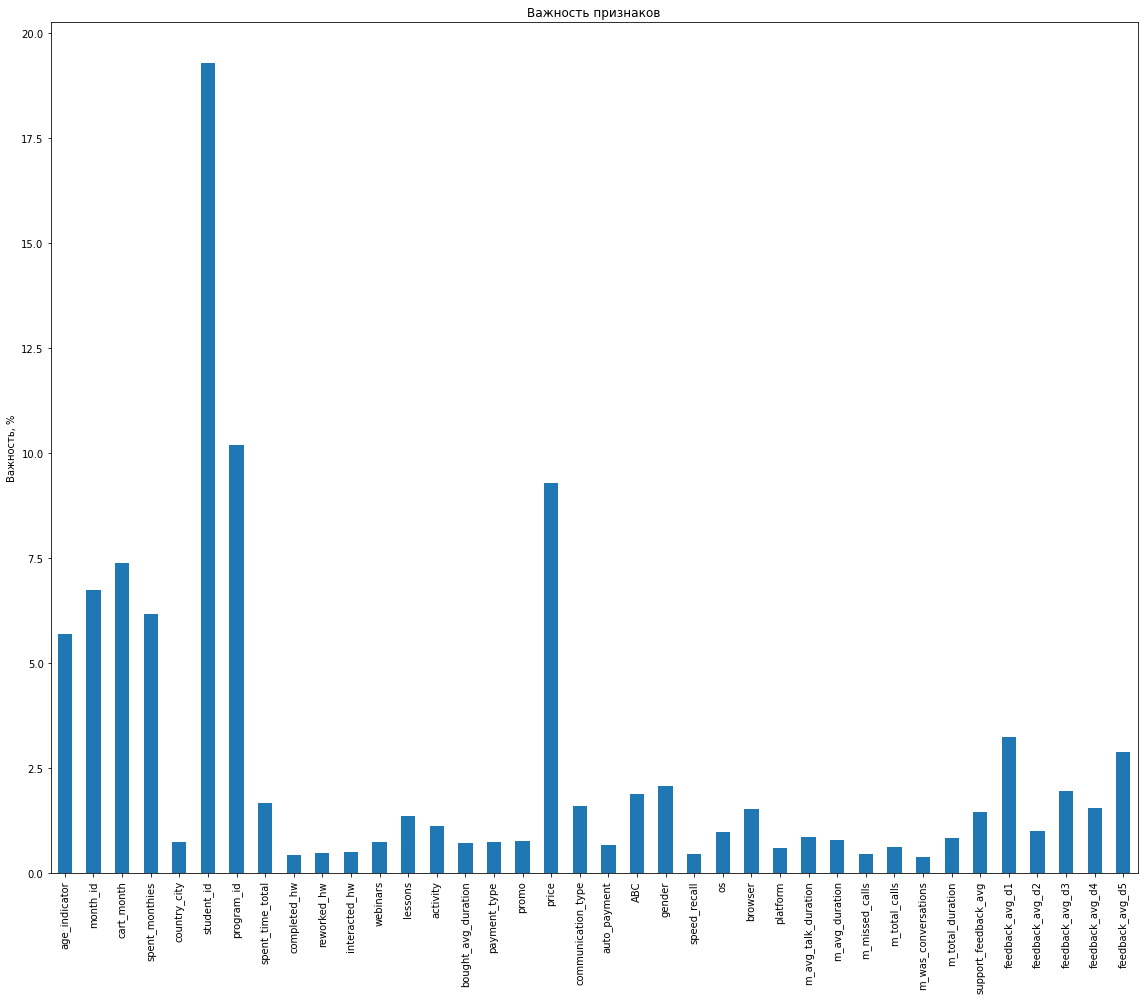

In [171]:
cv1_imp = pd.Series(cv.best_estimator_.get_feature_importance(),index=X_train.columns)

fig, ax = plt.subplots(figsize=(16,14))
cv1_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность, %')
fig.tight_layout()


## Предсказание

In [172]:
!wget https://lodmedia.hb.bizmrg.com/case_files/774967/test_dataset_test.csv

--2022-08-06 07:37:27--  https://lodmedia.hb.bizmrg.com/case_files/774967/test_dataset_test.csv
Resolving lodmedia.hb.bizmrg.com (lodmedia.hb.bizmrg.com)... 217.69.142.100
Connecting to lodmedia.hb.bizmrg.com (lodmedia.hb.bizmrg.com)|217.69.142.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14023004 (13M) [text/csv]
Saving to: ‘test_dataset_test.csv.1’

test_dataset_test.c 100%[===================>]  13.37M   546KB/s    in 25s     

2022-08-06 07:37:53 (547 KB/s) - ‘test_dataset_test.csv.1’ saved [14023004/14023004]



In [173]:
dt = pd.read_csv("/content/test_dataset_test.csv")

In [174]:
dt['country']=dt['country'].fillna('Россия')


In [175]:
dt['country']=dt['country'].apply(make_abroad)
dt['city']=dt['city'].apply(make_others)
#dt.insert(3, "country_city", dt['country']+dt['city'])
dt.insert(3, "country_city", dt['country']+'_'+dt['city'])
dt['month_id']=dt['month_id'].apply(strtomonth2000)
dt['carts_created_at']=dt['carts_created_at'].apply(strtomonth2000)
dt.insert(3, "spent_monthies", dt['month_id']-dt['carts_created_at'])
dt.insert(3, "cart_month", dt['carts_created_at'] % 12)
dt['gender'] = dt['gender'].fillna(0)
dt['gender']=dt['gender'].astype(int)
#print(min(df["month_id"]))=243
#print(max(df["month_id"]))=263
#dt['speed_recall']=dt['speed_recall'].fillna(0)
#dt['speed_recall']=dt['speed_recall'].astype(int)
dt['age_indicator']=dt['age_indicator'].fillna(0)
dt['age_indicator']=dt['age_indicator'].astype(int)

In [176]:
dt = dt.fillna(0)

In [177]:
X_valid = dt.drop(mass_object, axis = 1)

In [178]:
X_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84997 entries, 0 to 84996
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age_indicator         84997 non-null  int64  
 1   month_id              84997 non-null  int64  
 2   cart_month            84997 non-null  int64  
 3   spent_monthies        84997 non-null  int64  
 4   country_city          84997 non-null  object 
 5   student_id            84997 non-null  int64  
 6   program_id            84997 non-null  int64  
 7   spent_time_total      84997 non-null  float64
 8   completed_hw          84997 non-null  float64
 9   reworked_hw           84997 non-null  float64
 10  interacted_hw         84997 non-null  float64
 11  webinars              84997 non-null  float64
 12  lessons               84997 non-null  float64
 13  activity              84997 non-null  float64
 14  bought_avg_duration   84997 non-null  float64
 15  payment_type       

In [179]:
y_pred = clf.predict(X_valid)

In [180]:
index=None
df_result=pd.concat([dt['id'],pd.DataFrame(y_pred,index,['target'])],axis=1)

In [181]:
df_result.to_csv('./my_submission.csv', index=None)
df_result.to_csv('/content/drive/MyDrive/hacks_ai_2022/Netology/my_submission.csv', index=None)